In [1]:
# Import the dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# import linnear regression from the SciPy stats module
from scipy.stats import linregress
 

# Use the. citipy module to determine city based on latitude and longtitude
from citipy import citipy

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Import the time library and adtetime module from datetim library
import time
from datetime import datetime



In [2]:
# Create a set of random latitude and longtitude combinations
lats = np.random.uniform(low = -90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high=180.000,size = 1500)
lat_lngs = zip(lats, lngs)
#lat_lngs

In [3]:
coordinates = list(lat_lngs)
coordinates

[(60.23963048909681, 67.10203048477499),
 (-0.41193791283929215, 96.32702782839544),
 (42.68903835748333, 96.09705174142988),
 (3.050816710697333, -55.06944387965817),
 (48.746297451098485, 129.48358266624507),
 (-5.949027298518246, -157.13489252599499),
 (-82.55711208221213, -74.34509283313179),
 (-0.5477163035795343, -33.61262494067378),
 (73.55204464211417, -168.8719018608178),
 (-19.397432388025564, 105.10727263500718),
 (49.74199689324715, -26.16894707282333),
 (79.14725353979685, -45.21453836530671),
 (-52.991364965096274, 26.77832414168722),
 (-63.58489659693944, -73.52495206742559),
 (30.38279513962742, 48.443157052801695),
 (-56.797773928749834, 63.67293636290742),
 (25.754058764250843, 123.99734022677882),
 (7.941046747399312, -121.93900802839792),
 (-7.823364569695741, -75.09398577882891),
 (-88.82189520344798, -1.1115623628235483),
 (42.15493074473872, 44.09099485898611),
 (-49.05865319425603, -178.6498728209004),
 (-10.338118518664828, 145.24511468483945),
 (7.220557478023

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [5]:
# Build basic URL for the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng,
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kondinskoye
Processing Record 2 of Set 1 | sibolga
Processing Record 3 of Set 1 | hami
Processing Record 4 of Set 1 | grand-santi
Processing Record 5 of Set 1 | xinqing
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | abadan
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | ishigaki
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | contamana
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | gori
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | port moresby
Processing Recor

Processing Record 39 of Set 4 | gulshat
City not found. Skipping...
Processing Record 40 of Set 4 | swan hill
Processing Record 41 of Set 4 | caraballeda
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | strezhevoy
Processing Record 44 of Set 4 | udachnyy
Processing Record 45 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 46 of Set 4 | shenkursk
Processing Record 47 of Set 4 | svetlogorsk
Processing Record 48 of Set 4 | kargil
Processing Record 49 of Set 4 | guerrero negro
Processing Record 50 of Set 4 | sur
Processing Record 1 of Set 5 | parys
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | sayyan
Processing Record 4 of Set 5 | ibra
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | upata
Processing Record 7 of Set 5 | baykit
Processing Record 8 of Set 5 | atagay
Processing Record 9 of Set 5 | namatanai
Processing Record 10 of Set 5 | bur gabo
City not found. Skipping...
Process

Processing Record 29 of Set 8 | mamallapuram
Processing Record 30 of Set 8 | eyl
Processing Record 31 of Set 8 | gwadar
Processing Record 32 of Set 8 | yinchuan
Processing Record 33 of Set 8 | tuatapere
Processing Record 34 of Set 8 | rocha
Processing Record 35 of Set 8 | akcakoca
Processing Record 36 of Set 8 | satitoa
City not found. Skipping...
Processing Record 37 of Set 8 | mandalgovi
Processing Record 38 of Set 8 | san quintin
Processing Record 39 of Set 8 | nome
Processing Record 40 of Set 8 | santiago de cuba
Processing Record 41 of Set 8 | buta
Processing Record 42 of Set 8 | wagar
Processing Record 43 of Set 8 | cap malheureux
Processing Record 44 of Set 8 | beira
Processing Record 45 of Set 8 | la mira
Processing Record 46 of Set 8 | fallon
Processing Record 47 of Set 8 | senador guiomard
Processing Record 48 of Set 8 | henties bay
Processing Record 49 of Set 8 | isla vista
Processing Record 50 of Set 8 | challapata
Processing Record 1 of Set 9 | mezen
Processing Record 2 of

Processing Record 16 of Set 12 | sesheke
Processing Record 17 of Set 12 | amapa
Processing Record 18 of Set 12 | kincardine
Processing Record 19 of Set 12 | dagana
Processing Record 20 of Set 12 | avera
Processing Record 21 of Set 12 | manama
Processing Record 22 of Set 12 | chirongui
Processing Record 23 of Set 12 | manakara
Processing Record 24 of Set 12 | englehart
Processing Record 25 of Set 12 | airai
Processing Record 26 of Set 12 | jieshi
Processing Record 27 of Set 12 | atbasar
Processing Record 28 of Set 12 | pembroke
Processing Record 29 of Set 12 | sturgis
Processing Record 30 of Set 12 | bhadasar
Processing Record 31 of Set 12 | pangoa
Processing Record 32 of Set 12 | kushiro
Processing Record 33 of Set 12 | qidong
Processing Record 34 of Set 12 | mehamn
Processing Record 35 of Set 12 | burnie
Processing Record 36 of Set 12 | kieta
Processing Record 37 of Set 12 | pitimbu
Processing Record 38 of Set 12 | chumikan
Processing Record 39 of Set 12 | palmer
Processing Record 40 

In [7]:
len(city_data)

563

In [8]:
# Build data frame for city_data
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kondinskoye,59.6481,67.4100,19.87,88,100,10.71,RU,2022-02-18 05:11:20
1,sibolga,1.7427,98.7792,87.04,62,26,5.12,ID,2022-02-18 05:11:20
2,hami,42.8000,93.4500,23.85,30,2,2.06,CN,2022-02-18 05:11:21
3,grand-santi,4.2500,-54.3833,71.17,100,99,0.92,GF,2022-02-18 05:11:21
4,xinqing,48.2333,129.5000,14.11,71,100,1.01,CN,2022-02-18 05:11:21


In [9]:
# Rearange columns order
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,kondinskoye,RU,2022-02-18 05:11:20,59.6481,67.4100,19.87,88,100,10.71
1,sibolga,ID,2022-02-18 05:11:20,1.7427,98.7792,87.04,62,26,5.12
2,hami,CN,2022-02-18 05:11:21,42.8000,93.4500,23.85,30,2,2.06
3,grand-santi,GF,2022-02-18 05:11:21,4.2500,-54.3833,71.17,100,99,0.92
4,xinqing,CN,2022-02-18 05:11:21,48.2333,129.5000,14.11,71,100,1.01


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")


In [11]:
# Extract relevant data to make scatter plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [12]:
# Import the time module
import time
# Get today's date in seconds
today = time.strftime("%x")
today

'02/17/22'

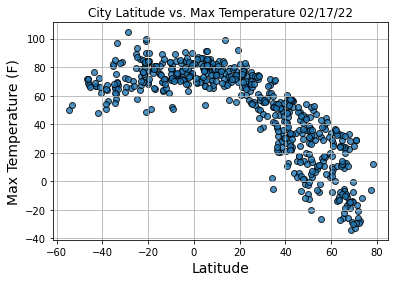

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)",fontsize =14)
plt.xlabel("Latitude",fontsize = 14)
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/city_lats_vs_max_temps.png")

# Show plot.
plt.show()

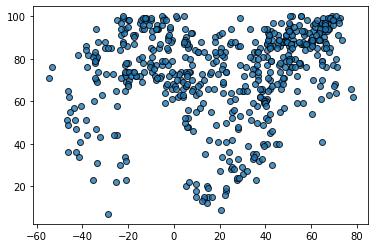

In [15]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolors = "black",
            marker = "o",
            alpha = 0.8, label = "Cities")
            
            
            
              

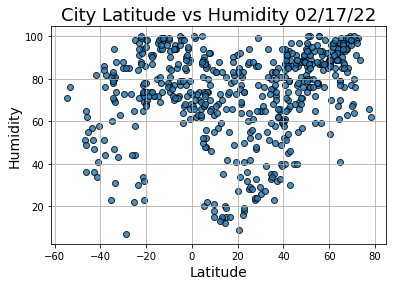

In [16]:
# Build the scatter plot for city latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolors = "black",
            marker = "o",
            alpha = 0.8, label = "Cities")
plt.title("City Latitude vs Humidity " + time.strftime("%x"),fontsize = 18)
plt.ylabel("Humidity",fontsize = 14)
plt.xlabel("Latitude",fontsize = 14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/City_Latitude_vs_Humidity.png")

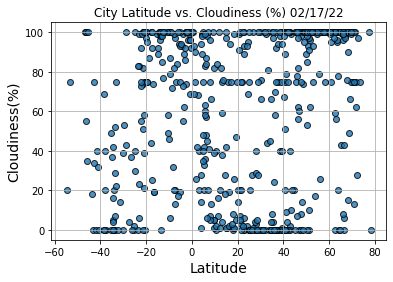

In [17]:
# Make scatter plot compare city latitude vs humidity 
plt.scatter(lats,
            cloudiness,
            edgecolors = "black",
            alpha = 0.8,
            label= "Cities",
            marker = "o")
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Cloudiness(%)", fontsize = 14)
plt.grid(True)

# Save figure
plt.savefig("weather_data/city_latitude_vs_humidity")

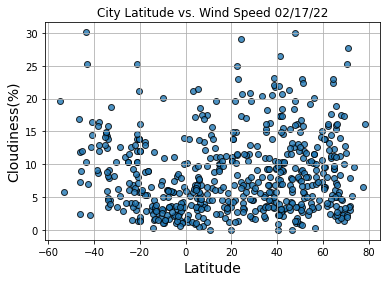

In [18]:
# Make scatter plot compare city latitude vs wind speed 
plt.scatter(lats,
            wind_speed,
            edgecolors = "black",
            alpha = 0.8,
            label= "Cities",
            marker = "o")
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Cloudiness(%)", fontsize = 14)
plt.grid(True)

# Save figure
plt.savefig("weather_data/city_latitude_vs_wind_speed")

In [27]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
city_data_df.loc[13]

City                       abadan
Country                        IR
Date          2022-02-18 05:11:24
Lat                       30.3392
Lng                       48.3043
Max Temp                    55.35
Humidity                       26
Cloudiness                     66
Wind Speed                   2.93
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,kondinskoye,RU,2022-02-18 05:11:20,59.6481,67.4100,19.87,88,100,10.71
1,sibolga,ID,2022-02-18 05:11:20,1.7427,98.7792,87.04,62,26,5.12
2,hami,CN,2022-02-18 05:11:21,42.8000,93.4500,23.85,30,2,2.06
3,grand-santi,GF,2022-02-18 05:11:21,4.2500,-54.3833,71.17,100,99,0.92
4,xinqing,CN,2022-02-18 05:11:21,48.2333,129.5000,14.11,71,100,1.01
...,...,...,...,...,...,...,...,...,...
554,tamworth,GB,2022-02-18 05:26:00,52.6340,-1.6959,52.65,95,100,8.01
555,albemarle,US,2022-02-18 05:26:01,35.3501,-80.2001,70.75,88,100,16.11
556,monywa,MM,2022-02-18 05:26:01,22.1167,95.1333,82.90,16,2,10.11
557,port lavaca,US,2022-02-18 05:25:01,28.6150,-96.6261,44.65,65,0,19.57


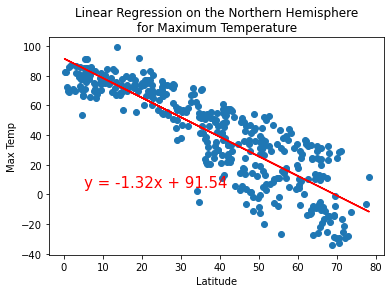

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title_north = "Linear Regression on the Northern Hemisphere\n" + "for Maximum Temperature"
# Call the function.
plot_linear_regression(x_values, y_values,
                       title_north, 'Max Temp',(5,5))

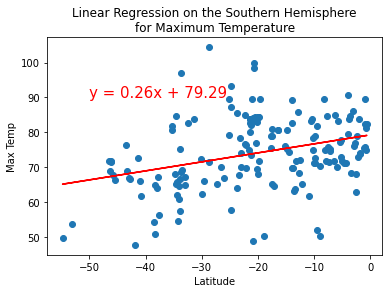

In [63]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title_south = "Linear Regression on the Southern Hemisphere\n" + "for Maximum Temperature"
# Call the function.
plot_linear_regression(x_values, y_values,
                       title_south, 'Max Temp',(-50,90))

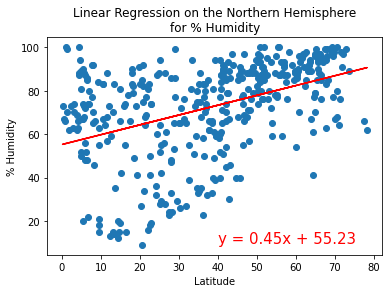

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Linear Regression on the Northern Hemisphere\n" + "for % Humidity"
# Call the function
plot_linear_regression(x_values,
                      y_values,
                      title,'% Humidity',(40,10))

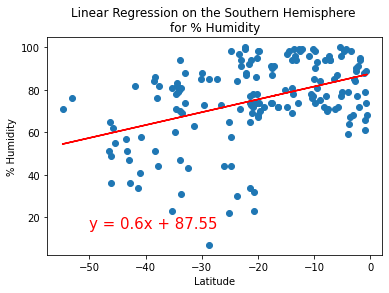

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = 'Linear Regression on the Southern Hemisphere \n'+'for % Humidity'
# Call the function.
plot_linear_regression(x_values, y_values,
                       title, '% Humidity',(-50,15))

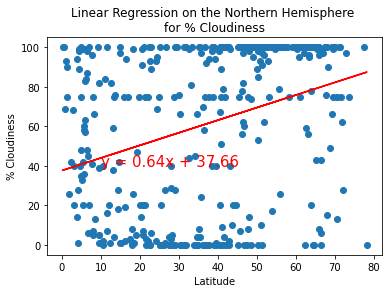

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = 'Linear Regression on the Northern Hemisphere \n'+'for % Cloudiness'

# Call function
plot_linear_regression(x_values,
                      y_values, title,
                      '% Cloudiness',(10,40))

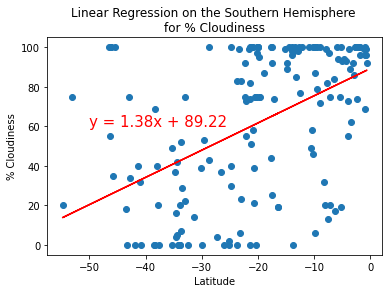

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = 'Linear Regression on the Southern Hemisphere \n'+'for % Cloudiness'

# Call function
plot_linear_regression(x_values,
                      y_values, title,
                      '% Cloudiness',(-50,60))

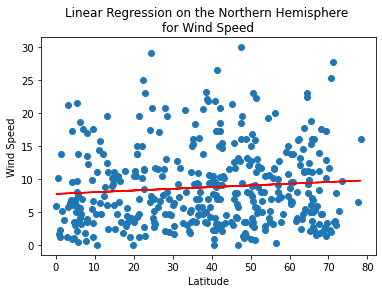

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = 'Linear Regression on the Northern Hemisphere \n' +'for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values,
                       title, 'Wind Speed',(40,35))

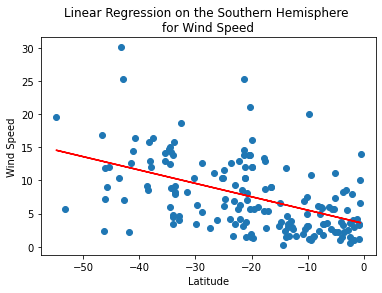

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = 'Linear Regression on the Southern Hemisphere \n' +'for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values,
                       title, 'Wind Speed',(-40,55))